<a href="https://colab.research.google.com/github/fsluizvictor/machine-learning-project/blob/main/water_quality_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and load data

#Water Quality Dataset

##Context

How thing essential to human, is very important can classifier the quality water
if is good or no to the consume.


##Content

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

1. pH value:
2. Hardness:
3. Solids (Total dissolved solids - TDS):
4. Chloramines:
5. Sulfate:
6. Conductivity:
7. Organic_carbon:
8. Trihalomethanes:
9. Turbidity:
10. Potability:



In [152]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [153]:
def file_path_name(file_name):
  return os.sep.join(['data'] + [file_name])

In [154]:
file_name = 'water_potability.csv'
file_path = file_path_name(file_name)
data = pd.read_csv(file_path, sep=',')

In [155]:
#from google.colab import drive
#drive.mount('/content/drive')

#Data Analysis

In [156]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [158]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [159]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [160]:
data.dropna(inplace=True)

#Division in Train and Test

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 23
np.random.seed(SEED)

X = data.drop('Potability', axis = 1)
y = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


print('Dataset to train : {} - Dataset to test: {}'.format(X_train.shape[0], X_test.shape[0]))


Dataset to train : 1608 - Dataset to test: 403


#Models using Cross Validation

In [162]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

models = [
          ('SVC',SVC()),
          ('Regressão Logística',LogisticRegression(solver='liblinear')),
]

for name,item in models:
  np.random.seed(SEED)
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'accuracy')
  mean = results.mean()
  dv = results.std()
  print('Average accuracy: - Model {}: {:.2f}%'.format(name, mean*100))
  print('Accuracy range - Model {}: [{:.2f}% ~ {:.2f}%]\n'.format(name, (mean - 2*dv)*100, (mean + 2*dv)*100))

Average accuracy: - Model SVC: 68.53%
Accuracy range - Model SVC: [66.79% ~ 70.27%]

Average accuracy: - Model Regressão Logística: 59.83%
Accuracy range - Model Regressão Logística: [58.39% ~ 61.26%]



# Métricas

**Precision**

In [163]:
for name,item in models:
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'precision')
  mean = results.mean()
  dv = results.std()

  print('Avarage precision: - Model {}: {:.2f}%'.format(name, mean*100))
  print('Precision range: - Model{}: [{:.2f}% ~ {:.2f}%]\n'
        .format(name, (mean - 2*dv)*100, (mean + 2*dv)*100))

Avarage precision: - Model SVC: 68.76%
Precision range: - ModelSVC: [66.80% ~ 70.72%]

Avarage precision: - Model Regressão Logística: 62.14%
Precision range: - ModelRegressão Logística: [29.12% ~ 95.17%]



**Recall**

In [164]:
for name,item in models:
  results = cross_val_score(item, X_train, y_train, cv = cv, scoring = 'recall')
  mean = results.mean()
  dv = results.std()

  print('Avarage recall: - Model {}: {:.2f}%'.format(name, mean*100))
  print('Precision recall: - Model{}: [{:.2f}% ~ {:.2f}%]\n'
        .format(name, (mean - 2*dv)*100, (mean + 2*dv)*100))

Avarage recall: - Model SVC: 33.18%
Precision recall: - ModelSVC: [20.78% ~ 45.59%]

Avarage recall: - Model Regressão Logística: 2.16%
Precision recall: - ModelRegressão Logística: [-0.66% ~ 4.98%]



**Precisão x Recall**

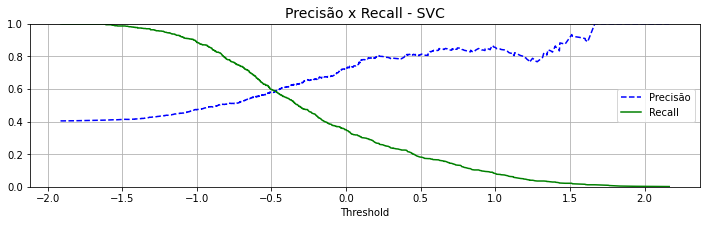

In [165]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = SVC()

y_scores = cross_val_predict(model, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,3))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.grid()
plt.ylim([0,1])
plt.title('Precisão x Recall - SVC', fontsize = 14)

plt.show()

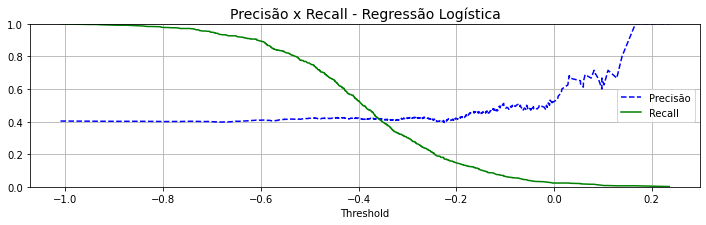

In [166]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')

y_scores = cross_val_predict(model, X_train, y_train, cv = cv, method = 'decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

fig, ax = plt.subplots(figsize = (12,3))

plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.grid()
plt.ylim([0,1])
plt.title('Precisão x Recall - Regressão Logística', fontsize = 14)

plt.show()

#Relatório de Classificação

In [167]:
from sklearn.metrics import classification_report

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = SVC()

y_pred = cross_val_predict(model, X_train, y_train, cv = cv)

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.6752    0.9115    0.7757       960
           1     0.7276    0.3503    0.4729       648

    accuracy                         0.6853      1608
   macro avg     0.7014    0.6309    0.6243      1608
weighted avg     0.6963    0.6853    0.6537      1608



In [168]:
from sklearn.metrics import classification_report

np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 5, shuffle = True)

model = LogisticRegression(solver='liblinear')

y_pred = cross_val_predict(model, X_train, y_train, cv = cv)

# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_train, y_pred, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.5994    0.9865    0.7457       960
           1     0.5357    0.0231    0.0444       648

    accuracy                         0.5983      1608
   macro avg     0.5675    0.5048    0.3950      1608
weighted avg     0.5737    0.5983    0.4631      1608



#Teste

In [169]:
np.random.seed(SEED)

final_model = SVC()
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.6803    0.9042    0.7764       240
           1     0.7262    0.3742    0.4939       163

    accuracy                         0.6898       403
   macro avg     0.7032    0.6392    0.6352       403
weighted avg     0.6988    0.6898    0.6621       403

